In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
test_full = pd.read_csv('test.csv')
train_full = pd.read_csv('train.csv')
train_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_full.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
print(train_full.dtypes)
print(train_full.count())
#cpount() here counts the number of unique values

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


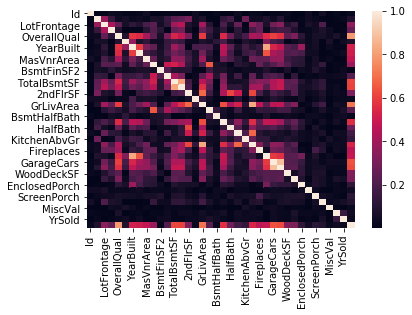

In [5]:
plt.figure()
sns.heatmap(np.abs(train_full.corr()))

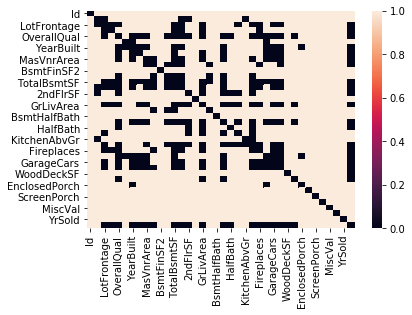

In [6]:
plt.figure()
sns.heatmap(np.abs(train_full.corr())<0.25)

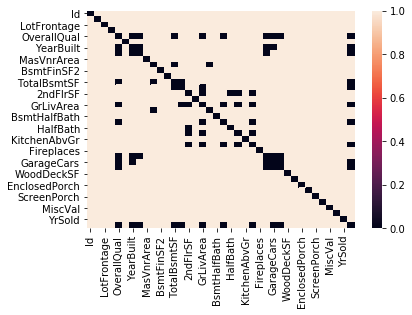

In [7]:
plt.figure()
sns.heatmap(np.abs(train_full.corr())<0.5)

In [8]:
# Note: need to rerun after creating numeric-type cols from existing string-type cols

In [9]:
pd.concat([train_full.mean(),train_full.std(),train_full.skew(),train_full.kurt()], axis=1,names=['mean','std','skew','kurtosis'],keys=['mean','std','skew','kurtosis'])

,mean,std,skew,kurtosis
Id,730.500000,421.610009,0.000000,-1.200000
MSSubClass,56.897260,42.300571,1.407657,1.580188
LotFrontage,70.049958,24.284752,2.163569,17.452867
LotArea,10516.828082,9981.264932,12.207688,203.243271
OverallQual,6.099315,1.382997,0.216944,0.096293
OverallCond,5.575342,1.112799,0.693067,1.106413
YearBuilt,1971.267808,30.202904,-0.613461,-0.439552
YearRemodAdd,1984.865753,20.645407,-0.503562,-1.272245
MasVnrArea,103.685262,181.066207,2.669084,10.082417
BsmtFinSF1,443.639726,456.098091,1.685503,11.118236
